In [1]:
#импортируем необходимые библиотеки
from scipy.integrate import odeint
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Исходя из учебника, система выглядит как
\begin{equation*}
 \begin{cases}
   \dot{x} = v &\\
   \dot{v} = b sin(x) + k_{1}x + k_{2}sin(x) + k_{3}v &
 \end{cases}
\end{equation*}
, где $k_1 = -\frac{1}{8}$, $k_2 = -b$, $k_3 = -\frac{3}{4}$.
Подставив значения коэффициентов, получим, что
\begin{equation*}
 \begin{cases}
   \dot{x} = v &\\
   \dot{v} = -\frac{1}{8}x - \frac{3}{4}v &
 \end{cases}
\end{equation*}

Решим это уравнение и построим график, в качестве интервала для $x$ возьмем $[-\frac{\pi}{2}; \frac{\pi}{2}]$

In [2]:
#в данной функции опишем вектор значений x и v как системы
def vectorfield(w, t):
  x, v = w
  f = [v, -0.125*x - 0.75*v]
  return f

In [3]:
#начальные условия
x_0 = 0 #начальное положение x
v_0 = 1 #начальное положение v
w0 = [x_0, v_0]

In [4]:
#опишем параметры solver'а
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 100 #на каком моменте останавливать счет
numpoints = 1000 #число точек, на котором проводится расчет

In [5]:
#получаем список массивов времени исходя из данных
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

In [6]:
#здесь мы описываем солвер
#на выход мы получим список значений x и v в каждый из промежутков времени
wsol = odeint(vectorfield, w0, t, args=(),
              atol=abserr, rtol=relerr)

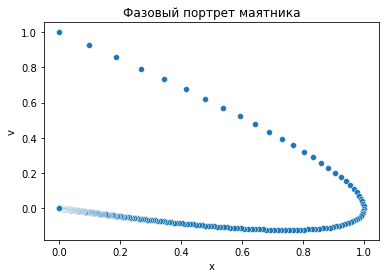

In [7]:
df = pd.DataFrame({'x':wsol[:, 0], 'v':wsol[:, 1]})
sns.scatterplot(data=df, x='x', y='v')
plt.title('Фазовый портрет маятника')
plt.show()

Как видно, полученная система действительно обладает стабилизационным эффектом. При всех подборах параметров начальных условий система возвращается в состояние [0, 0].